<a href="https://colab.research.google.com/github/Charan1192/IoT/blob/main/Decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best hyperparameters: {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_split': 2}
Accuracy: 0.8523809523809524


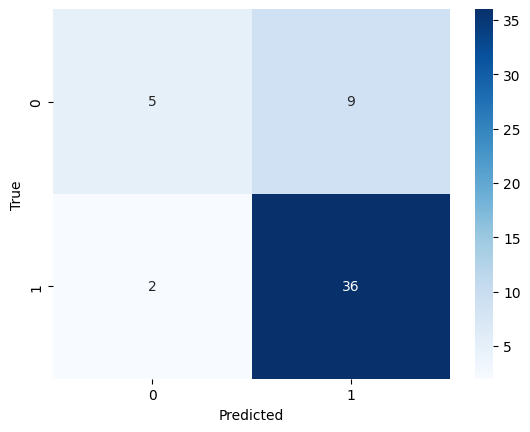

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('/content/clean.csv')

# Split the data into features and target
X = data.iloc[:, 1:6].values
y = data.iloc[:, 6].values
X = X.astype(np.float32)

# create pipeline with standard scaler and decision tree classifier
pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('clf', DecisionTreeClassifier(random_state=42))])

# define hyperparameters to tune
param_grid = {'clf__criterion': ['log_loss','gini','entropy'],
              'clf__max_depth': [None, 5, 10, 15],
              'clf__min_samples_split': [2, 5, 10]}

# create grid search object
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=10, scoring='accuracy')
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# fit grid search object to the data
grid_search.fit(X_train, y_train)

# get best estimator
best_estimator = grid_search.best_estimator_

# print best hyperparameters and accuracy
print('Best hyperparameters:', grid_search.best_params_)
print('Accuracy:', grid_search.best_score_)

# use best estimator to make predictions on test set
y_pred = best_estimator.predict(X_test)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()